# Pre-req Steps:
Next couple of cells contains setting up necessary libraries and dataset details.  

## Library Installation

In [1]:
# Install pandas
!pip install pandas

# Install numpy
!pip install numpy

# Install matplotlib
!pip install matplotlib

# Install seaborn
!pip install seaborn


## Importing Libraries
Import the necessary libraries for data manipulation and visualization. If you need additional libraries, you need to include that.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy import stats

## Dataset Descriptions

The Income dataset, also known as the "Census Income" dataset, contains demographic information about adults and is used for classification tasks. The dataset includes the following columns:

- **age**: Age of the individual.
- **workclass**: Type of employment (e.g., Private, Self-emp-not-inc, etc.).
- **fnlwgt**: Final weight, representing the number of people in the population that the instance represents.
- **education**: Level of education (e.g., Bachelors, Masters, etc.).
- **education-num**: Numeric representation of education level.
- **marital-status**: Marital status (e.g., Married-civ-spouse, Never-married, etc.).
- **occupation**: Type of occupation (e.g., Tech-support, Craft-repair, etc.).
- **relationship**: Relationship status (e.g., Husband, Not-in-family, etc.).
- **race**: Race of the individual (e.g., White, Black, Asian-Pac-Islander, etc.).
- **sex**: Gender of the individual (Male, Female).
- **hours-per-week**: Number of hours worked per week.
- **native-country**: Country of origin (e.g., United-States, Mexico, etc.).
- **income**: Target variable indicating if income exceeds $50,000/year (<=50K or >50K).

# Data Analytics

## Import the Dataset. 
Use **income_data.csv** from BlackBoard. Create a new data frame called df to import the data

In [2]:
col_names = ['Age', 'Workclass', 'FinalWeight', 'Education', 'EducationNum', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours-Per-Week', 'Native Country', 'Income']
df = pd.read_csv('income_data.csv', header=None, names=col_names)
df

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


## Exploring Data Types
- Question: Determine and display the data types of each column.

In [8]:
# Display the first 5 rows of the dataset
df.head(5)

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [9]:
# Display the last 5 rows of the dataset
df.tail(5)

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [10]:
# Find out column types
df.dtypes

Age                int64
Workclass         object
FinalWeight        int64
Education         object
EducationNum       int64
MaritalStatus     object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours-Per-Week     int64
Native Country    object
Income            object
dtype: object

## Identifying Missing Values
- Question: Find and display any missing values in the dataset, and calculate the percentage of missing values for each column.

In [11]:
# missing value calculation
df.isnull().mean() * 100

Age               0.0
Workclass         0.0
FinalWeight       0.0
Education         0.0
EducationNum      0.0
MaritalStatus     0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Hours-Per-Week    0.0
Native Country    0.0
Income            0.0
dtype: float64

## Handling Missing Values
- Question: Handle the missing values in the dataset using appropriate imputation methods. Save the cleaned datasets to new CSV files.

In [23]:
#handle missing value for column Workclass
df.Workclass.value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [59]:
df.Workclass.value_counts()

Workclass
Private             22671
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [60]:
#df.Workclass.apply(lambda x: x if x != '?' else 'Unknown').value_counts()
df.Workclass.map({ '?': 'Unknown' }).value_counts()

Series([], Name: count, dtype: int64)

In [46]:
# handle missing value by imputation
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] =df['Income'].fillna(df['Income'].mode()[0])
df['Workclass'] = df['Workclass'].fillna('Unknown')
df['Hours-Per-Week'] = df['Hours-Per-Week'].fillna(method='ffill')

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_34671/3890541548.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Hours-Per-Week'] = df['Hours-Per-Week'].fillna(method='ffill')


In [25]:
#save to new csv
df.to_csv('income_data_v1.csv', index=False)

## Data Cleaning
- Question: Remove any duplicate records from the dataset and save the cleaned data to new file.

In [3]:
# remove duplicate values
df.duplicated().sum()

np.int64(26)

In [4]:
df.drop_duplicates(inplace=True)

In [15]:
# save to a new csv file
df.to_csv('income_data_v2.csv', index=False)

## Feature Engineering

- Question: Create a new feature in the Adult Income dataset that represents the interaction between the `age` and `hours-per-week` columns. Name the new feature `age_hours_interaction`. 

This new feature should capture the combined effect of age and the number of hours worked per week.


In [16]:
df['Hours-Per-Week'].describe()

count    32535.000000
mean        40.441094
std         12.346525
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours-Per-Week, dtype: float64

In [5]:
#new feature
df['age_hours_interaction'] = (df['Age'] * df['Hours-Per-Week'])
df

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income,age_hours_interaction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1560
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,650
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,1520
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,2120
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,1026
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1600
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,2320
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,440


## Data Normalization
- Question: Normalize the numerical features in the dataset using min-max normalization or z-score standardization.

In [18]:
# normalize data
df.dtypes

Age                        int64
Workclass                 object
FinalWeight                int64
Education                 object
EducationNum               int64
MaritalStatus             object
Occupation                object
Relationship              object
Race                      object
Sex                       object
Hours-Per-Week             int64
Native Country            object
Income                    object
age_hours_interaction    float64
dtype: object

In [19]:
# The numerical features are (Age, FinalWeight, EducationNum, Hours-Per-Week, age_hours_interaction)
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['FinalWeight'] = scaler.fit_transform(df[['FinalWeight']])
df['EducationNum'] = scaler.fit_transform(df[['EducationNum']])
df['Hours-Per-Week'] = scaler.fit_transform(df[['Hours-Per-Week']])
df['age_hours_interaction'] = scaler.fit_transform(df[['age_hours_interaction']])
df

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income,age_hours_interaction
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K,0.009691
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K,0.045221
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K,0.009381
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K,0.014022
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Cuba,<=50K,0.006287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.377551,United-States,<=50K,0.006418
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.397959,United-States,>50K,0.010000
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.397959,United-States,<=50K,0.015569
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.193878,United-States,<=50K,0.011238


## Handling Outliers
- Question: Inspect any col has outlier value and handle them using any method you prefer.

<Axes: >

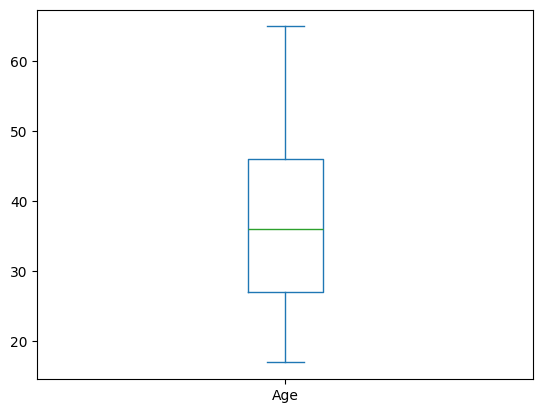

In [29]:
# identify outlier
df.Age.plot(kind='box')

<Axes: >

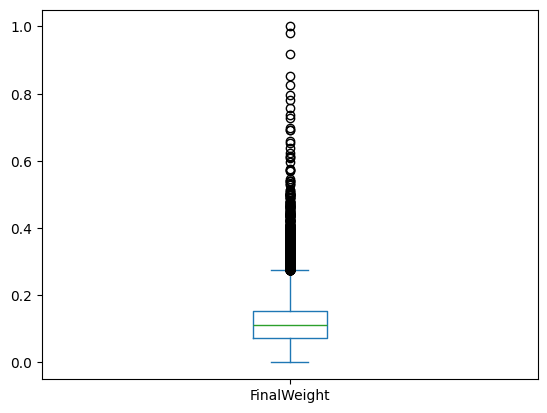

In [21]:
df.FinalWeight.plot(kind='box')

<Axes: >

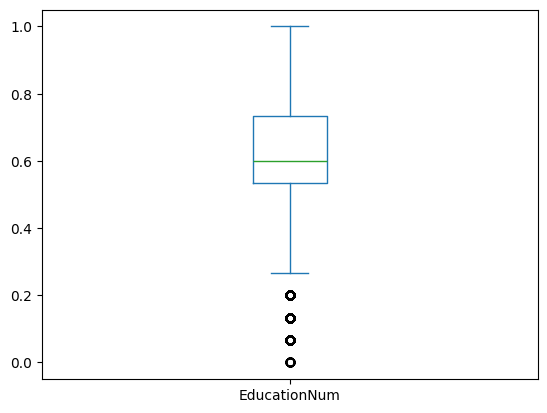

In [22]:
df.EducationNum.plot(kind='box')

<Axes: >

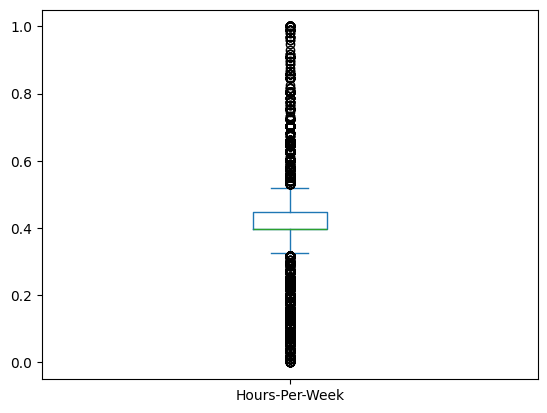

In [23]:
df['Hours-Per-Week'].plot(kind='box')

In [27]:
# handle outlier
df['ZScore_Age'] = np.abs(stats.zscore(df['Age']))
df = df[df['ZScore_Age'] < 2]

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_58864/2679992802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ZScore_Age'], inplace=True)


<Axes: >

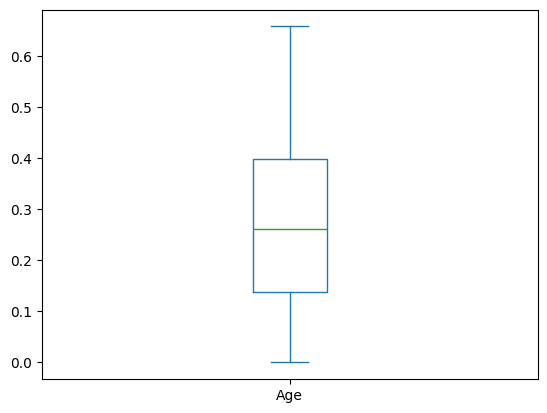

In [26]:
df.drop(columns=['ZScore_Age'], inplace=True)
df.Age.plot(kind='box')

In [27]:
df['ZScore_FinalWeight'] = np.abs(stats.zscore(df['FinalWeight']))
df = df[df['ZScore_FinalWeight'] < 3]

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_58864/4092696298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZScore_FinalWeight'] = np.abs(stats.zscore(df['FinalWeight']))


<Axes: >

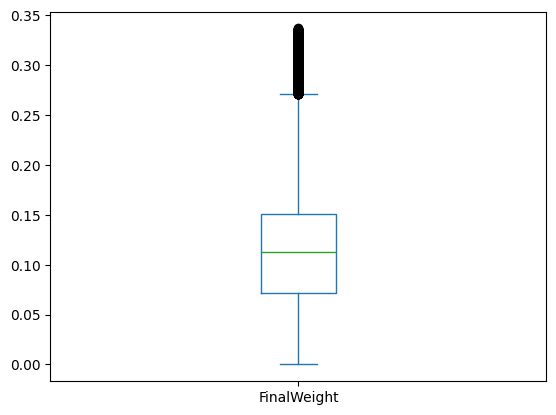

In [28]:
df.drop(columns=['ZScore_FinalWeight'], inplace=True)
df.FinalWeight.plot(kind='box')

In [29]:
df['ZScore_EducationNum'] = np.abs(stats.zscore(df['EducationNum']))
df = df[df['ZScore_EducationNum'] < 3]

<Axes: >

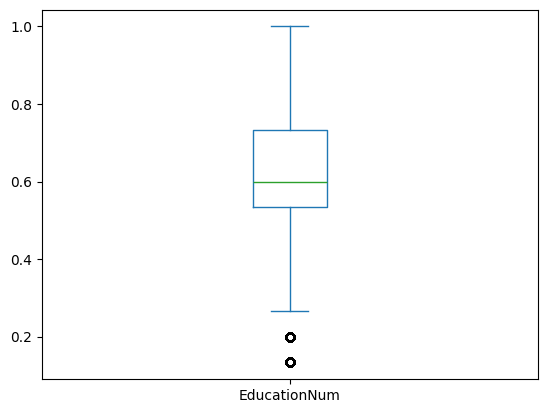

In [30]:
df.drop(columns=['ZScore_EducationNum'], inplace=True)
df.EducationNum.plot(kind='box')

In [31]:
df['ZScore_Hours-Per-Week'] = np.abs(stats.zscore(df['Hours-Per-Week']))
df = df[df['ZScore_Hours-Per-Week'] < 3]

<Axes: >

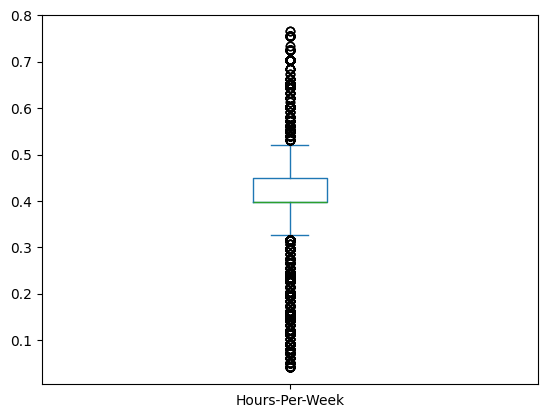

In [32]:
df.drop(columns=['ZScore_Hours-Per-Week'], inplace=True)
df['Hours-Per-Week'].plot(kind='box')

In [36]:
# Using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income,age_hours_interaction,log_age,sqrt_age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1560,3.663562,6.244998
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,650,3.912023,7.071068
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,1520,3.637586,6.164414
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,2120,3.970292,7.280110
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,1120,3.332205,5.291503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,1026,3.295837,5.196152
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1600,3.688879,6.324555
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,2320,4.060443,7.615773
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,440,3.091042,4.690416


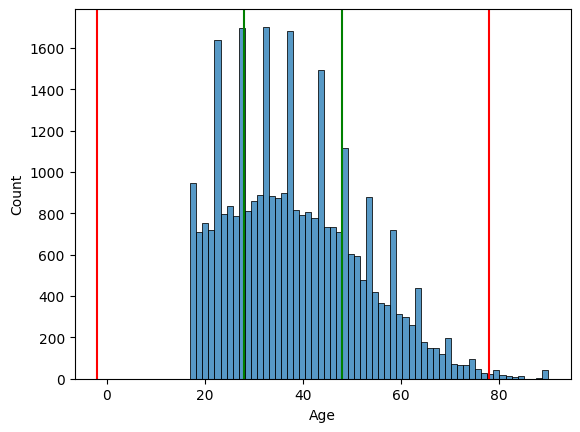

In [48]:
# Visualize the distribution of Age
sns.histplot(df.Age)
plt.axvline(upper_bound, color='r')
plt.axvline(lower_bound, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

## Data Transformation
- Question: Apply log transformation to skewed numerical features [if any]


In [33]:
df.dtypes

Age                      float64
Workclass                 object
FinalWeight              float64
Education                 object
EducationNum             float64
MaritalStatus             object
Occupation                object
Relationship              object
Race                      object
Sex                       object
Hours-Per-Week           float64
Native Country            object
Income                    object
age_hours_interaction    float64
dtype: object

<Axes: >

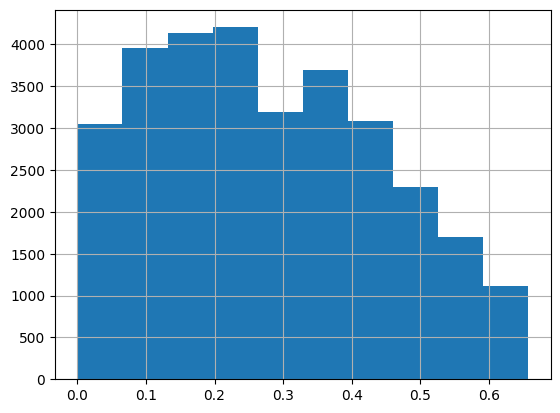

In [34]:
df.Age.hist()

<Axes: >

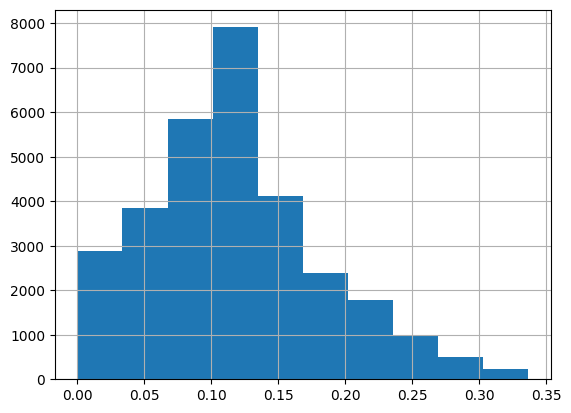

In [35]:
df.FinalWeight.hist()

<Axes: >

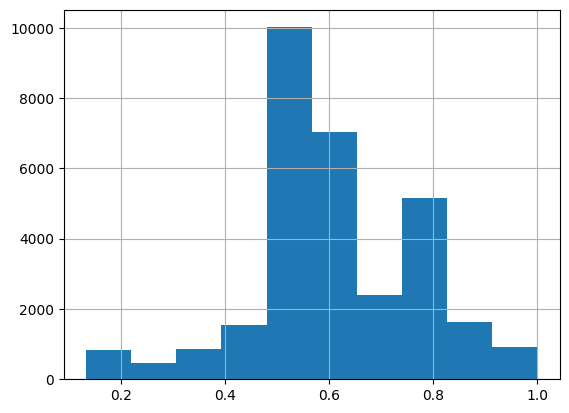

In [32]:
df.EducationNum.hist()

<Axes: >

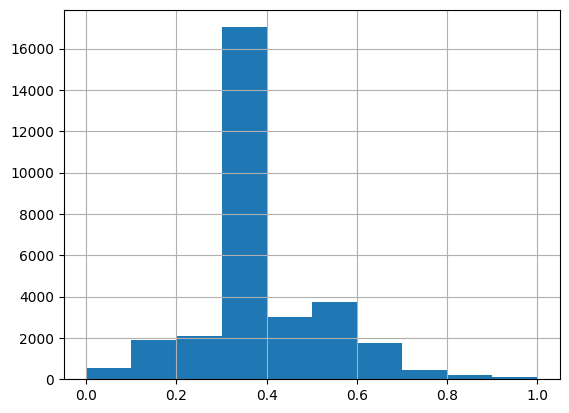

In [33]:
df['Hours-Per-Week'].hist()

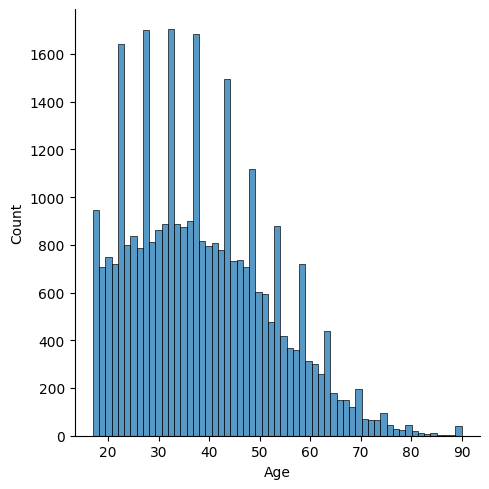

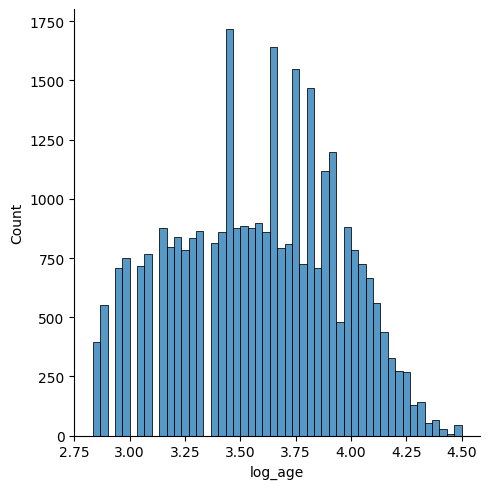

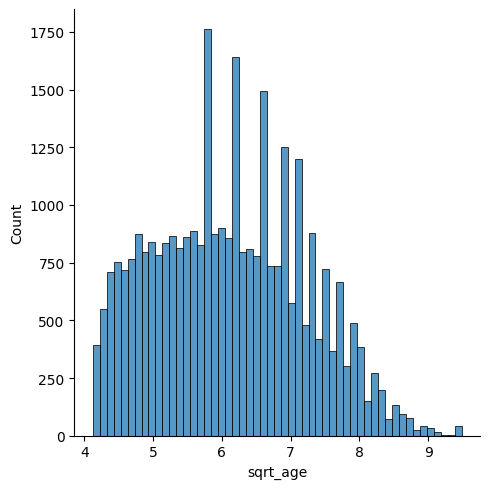

In [35]:
# Applying log transformation to Age column, because it has a moderate right skewed
# After applying log/sqrt transformation to age we see it makes it too left skewed
# base on this analysis we don't apply log transformation to any column because the other numeric columns follow almos a normal distribution
df['log_age'] = np.log(df.Age)
df['sqrt_age'] = np.sqrt(df['Age'])
sns.displot(df['Age'])
sns.displot(df['log_age'])
sns.displot(df['sqrt_age'])
plt.show()

In [38]:
df.drop(columns=['log_age'], inplace=True)
df

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income,age_hours_interaction
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K,0.009691
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K,0.045221
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K,0.009381
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K,0.014022
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Cuba,<=50K,0.006287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.377551,United-States,<=50K,0.006418
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.397959,United-States,>50K,0.010000
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.397959,United-States,<=50K,0.015569
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.193878,United-States,<=50K,0.011238


## Model Training - Classification

- Question: Train a logistic regression model using the Adult Income dataset to predict whether an individual's income exceeds $50,000/year (`income`). Evaluate the model using appropriate metrics.

In [7]:
encoder = LabelEncoder()
df_encoded = df.copy()

In [8]:
# Encode categorical variables (you need to handle this part based on your dataset)
df_encoded['Workclass'] = encoder.fit_transform(df['Workclass'])
df_encoded['Education'] = encoder.fit_transform(df['Education'])
df_encoded['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df_encoded['Occupation'] = encoder.fit_transform(df['Occupation'])
df_encoded['Relationship'] = encoder.fit_transform(df['Relationship'])
df_encoded['Race'] = encoder.fit_transform(df['Race'])
df_encoded['Sex'] = encoder.fit_transform(df['Sex'])
df_encoded['Native Country'] = encoder.fit_transform(df['Native Country'])
df_encoded.head()

,Age,Workclass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native Country,Income,age_hours_interaction
0,39,7,77516,9,13,4,1,1,4,1,40,39,<=50K,1560
1,50,6,83311,9,13,2,4,0,4,1,13,39,<=50K,650
2,38,4,215646,11,9,0,6,1,4,1,40,39,<=50K,1520
3,53,4,234721,1,7,2,6,0,2,1,40,39,<=50K,2120
4,28,4,338409,9,13,2,10,5,2,0,40,5,<=50K,1120


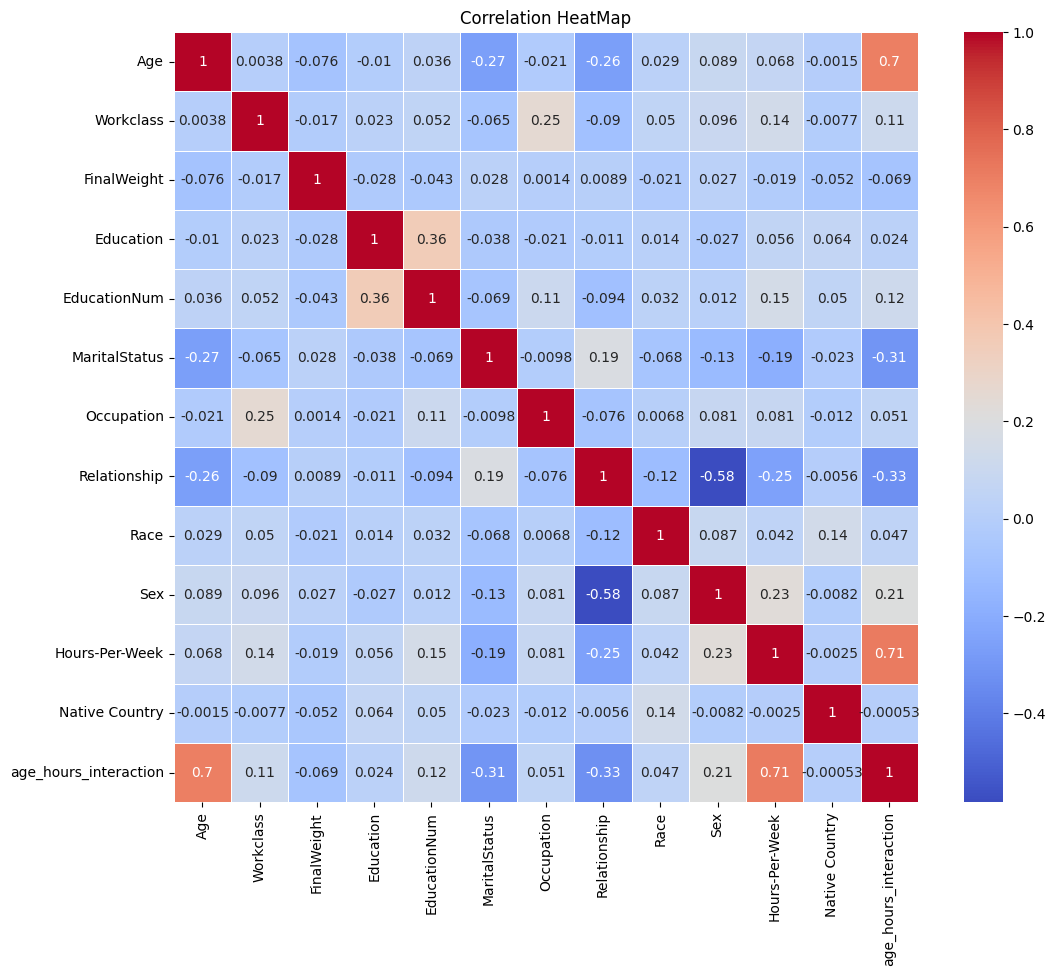

In [51]:
# Correlation HeatMap
df_features = df_encoded.drop('Income', axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation HeatMap')
plt.show()

In [56]:
df_encoded.Income.value_counts()

Income
<=50K    23040
>50K      7393
Name: count, dtype: int64

In [32]:
df_encoded.Income.map({ '<=50k': True, '>50k': False }).value_counts()

Series([], Name: count, dtype: int64)

In [31]:
# Prepare feature matrix X and target vector y 
X = df_encoded.drop('Income', axis=1)
y = (df_encoded.Income == '<=50k').values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.False_

## Apply clustering model
- Question: Apply a KNN model in your dataset. Perform necessary changes to apply KNN model 

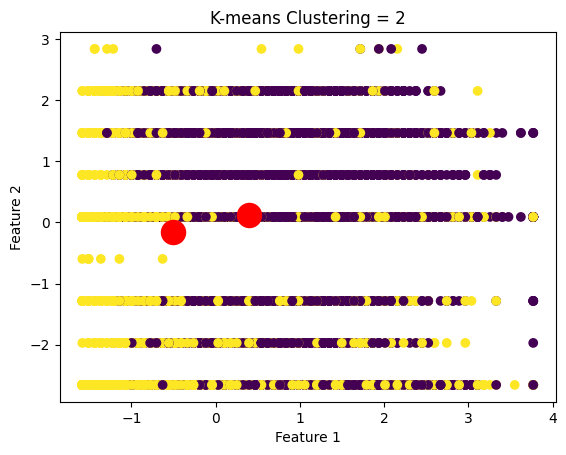

In [29]:
numeric_data = df_encoded.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Train the model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
y_labels = kmeans.predict(scaled_data)

# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
